In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#loading the data from csv file to a pandas datafram
customer_data = pd.read_csv('Mall_Customers.csv')


In [3]:
#first 5 rows in the dataframe
customer_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#finding the number of rows and coloumns
customer_data.shape


(200, 5)

In [5]:
#grtting some information about the dataset
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
x = customer_data.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [8]:
#choosing the number of clusters
#WCSS ->  within clusters sum of square
# finding wcss value for different number of clusters
wcss = []
for i in range(1,11):
    kMeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kMeans.fit(x)
    wcss.append(kMeans.inertia_)

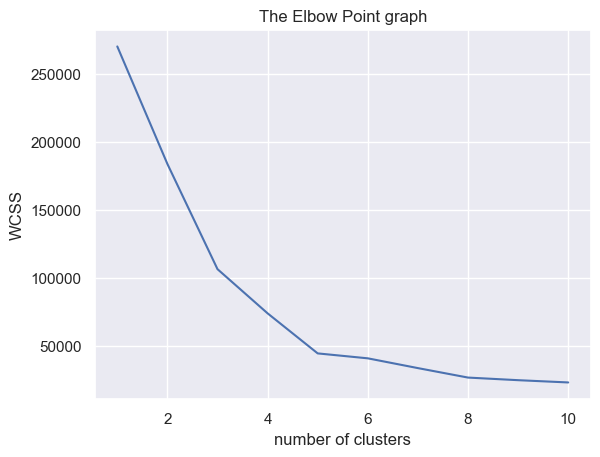

In [9]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point graph')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#optimum number of clusters =5
#training the k-means clustering 
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
#return a label for each data point based on the clusrer
Y = kmeans.fit_predict(x)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


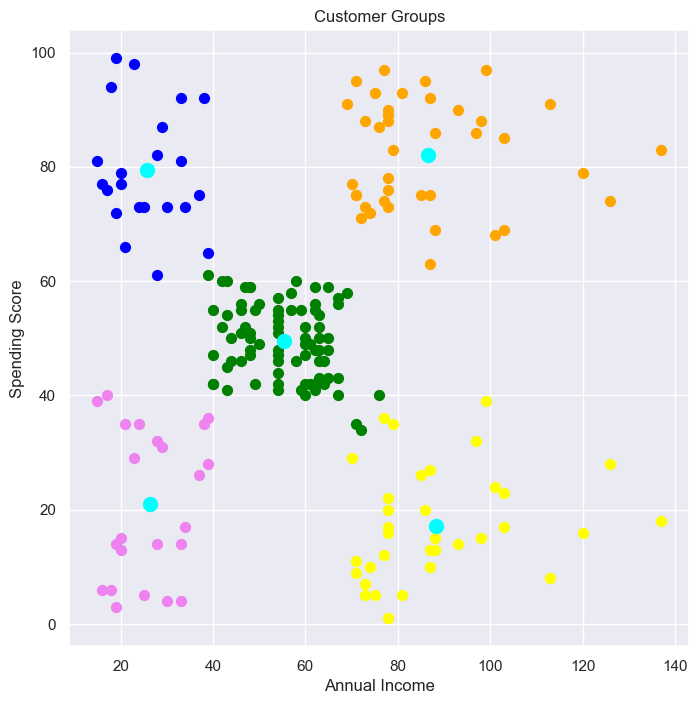

In [11]:
#visualising all the clusters
#plotting all the clusers and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0], x[Y==0,1], s=50, c='green', label ='Cluster 1')
plt.scatter(x[Y==1,0], x[Y==1,1], s=50, c='orange', label ='Cluster 2')
plt.scatter(x[Y==2,0], x[Y==2,1], s=50, c='yellow', label ='Cluster 3')
plt.scatter(x[Y==3,0], x[Y==3,1], s=50, c='violet', label ='Cluster 4')
plt.scatter(x[Y==4,0], x[Y==4,1], s=50, c='blue', label ='Cluster 5')

## plot the centroids 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()